# Alpha Vantage Time Series

In [36]:
from alpha_vantage.timeseries import TimeSeries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)

key = os.environ['av_key']

In [37]:
tickers = ['PLTR', 'TSLA', 'NVDA', 'CRDO', 'META', 'GOOG', 'AMZN', 'AAPL', 'MSFT', 'MMM', 'CVX', 'PFE', 'INTC']

for itick in tickers:
    ts = TimeSeries(key=key, output_format='pandas')
    data, meta_data = ts.get_daily(symbol=itick, outputsize='full')
    data.to_parquet(f"{itick}_daily.parquet")

In [4]:
ticker = 'PLTR'

In [266]:
ts = TimeSeries(key=key, output_format='pandas')
data, meta_data = ts.get_daily(symbol='GOOG', outputsize='full')
data['4. close'].plot()
plt.title('Intraday Times Series for the PLTR stock (1 day)')
plt.show()

ValueError: Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.

In [166]:
data['4. close'].count()

2640

In [167]:
data['4. close'].max()

3014.18

In [168]:
meta_data

{'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
 '2. Symbol': 'GOOG',
 '3. Last Refreshed': '2024-09-20',
 '4. Output Size': 'Full size',
 '5. Time Zone': 'US/Eastern'}

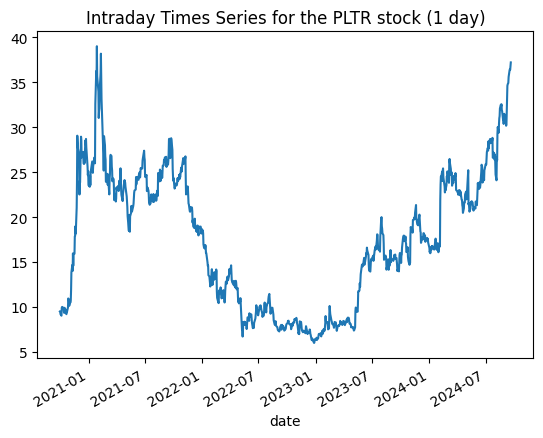

In [176]:
data, meta_data = ts.get_daily(symbol='PLTR', outputsize='full')
data['4. close'].plot()
plt.title('Intraday Times Series for the PLTR stock (1 day)')
plt.show()

In [177]:
data.shape

(1000, 5)

## Building label

In [178]:
data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2024-09-20,36.01,37.29,35.7100,37.20,450290538.0
2024-09-19,37.00,37.35,36.2000,36.83,59882041.0
2024-09-18,35.90,37.11,35.8712,36.38,66279770.0
2024-09-17,37.00,37.05,35.8700,36.45,64461751.0
2024-09-16,35.78,36.92,35.5600,36.31,74767329.0


In [184]:
df_label_main = pd.DataFrame(index=data.index)

td7 = dt.timedelta(days=7)
td14 = dt.timedelta(days=14)
td21 = dt.timedelta(days=21)
td30 = dt.timedelta(days=30)

df_label_main['label_close7'] = np.nan
df_label_main['label_close14'] = np.nan
df_label_main['label_close21'] = np.nan
df_label_main['label_close30'] = np.nan
df_label_main['4. close'] = data['4. close'].values

for idate in data.index:
    df_label_main.loc[idate, 'label_close7'] = data.loc[(data.index >= idate) & (data.index <= idate + td7), '4. close'].max()
    df_label_main.loc[idate, 'label_close14'] = data.loc[(data.index >= idate) & (data.index <= idate + td14), '4. close'].max()
    df_label_main.loc[idate, 'label_close21'] = data.loc[(data.index >= idate) & (data.index <= idate + td21), '4. close'].max()
    df_label_main.loc[idate, 'label_close30'] = data.loc[(data.index >= idate) & (data.index <= idate + td30), '4. close'].max()


In [185]:
df_label_main['label_close7'] = (df_label_main.label_close7 - data['4. close'])/ df_label_main['4. close']
df_label_main['label_close14'] = (df_label_main.label_close14 - data['4. close'])/ df_label_main['4. close']
df_label_main['label_close21'] = (df_label_main.label_close21 - data['4. close'])/ df_label_main['4. close']
df_label_main['label_close30'] = (df_label_main.label_close30 - data['4. close'])/ df_label_main['4. close']

In [186]:
df_label_main.head(30)

,label_close7,label_close14,label_close21,label_close30,4. close
date,,,,,
2024-09-20,0.000000,0.000000,0.000000,0.000000,37.20
2024-09-19,0.010046,0.010046,0.010046,0.010046,36.83
2024-09-18,0.022540,0.022540,0.022540,0.022540,36.38
2024-09-17,0.020576,0.020576,0.020576,0.020576,36.45
2024-09-16,0.024511,0.024511,0.024511,0.024511,36.31
2024-09-13,0.045237,0.045237,0.045237,0.045237,35.59
2024-09-12,0.054999,0.065597,0.065597,0.065597,34.91
2024-09-11,0.045911,0.067432,0.067432,0.067432,34.85
2024-09-10,0.048619,0.070196,0.070196,0.070196,34.76


## Building features

In [187]:
df_feature = pd.DataFrame(index=data.index)

In [188]:
td7 = dt.timedelta(days=7)
td14 = dt.timedelta(days=14)
td21 = dt.timedelta(days=21)
td28 = dt.timedelta(days=28)

df_feature['f_mean_close7'] = np.nan
df_feature['f_mean_close14'] = np.nan
df_feature['f_mean_close21'] = np.nan
df_feature['f_mean_close28'] = np.nan
df_feature['f_mean_close7_14'] = np.nan
df_feature['f_mean_close14_21'] = np.nan
df_feature['f_mean_close21_28'] = np.nan
df_feature['4. close'] = data['4. close'].values

for idate in data.index:
    df_feature.loc[idate, 'f_mean_close7'] = data.loc[(data.index <= idate) & (data.index >= idate - td7), '4. close'].mean()
    df_feature.loc[idate, 'f_mean_close14'] = data.loc[(data.index <= idate) & (data.index >= idate - td14), '4. close'].mean()
    df_feature.loc[idate, 'f_mean_close21'] = data.loc[(data.index <= idate) & (data.index >= idate - td21), '4. close'].mean()
    df_feature.loc[idate, 'f_mean_close28'] = data.loc[(data.index <= idate) & (data.index >= idate - td28), '4. close'].mean()
    df_feature.loc[idate, 'f_mean_close7_14'] = data.loc[(data.index <= idate - td7) & (data.index >= idate - td14), '4. close'].mean()
    df_feature.loc[idate, 'f_mean_close14_21'] = data.loc[(data.index <= idate - td14) & (data.index >= idate - td21), '4. close'].mean()
    df_feature.loc[idate, 'f_mean_close21_28'] = data.loc[(data.index <= idate - td21) & (data.index >= idate - td28), '4. close'].mean()

## Related commodity (copper)

In [262]:
from alpha_vantage.commodities import Commodities

comm = Commodities(key=key, output_format='pandas')
data, meta_data = comm.get_copper(interval='monthly')

ValueError: Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.

In [ ]:
data.dtypes

In [261]:
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')
data['price'] = np.nan
data.loc[data['value']!='.', 'price'] = data.loc[data['value']!='.', 'value'].astype('double')

data_l1m = data.copy()
data_l1m['date'] = pd.to_datetime(data_l1m.index) + pd.DateOffset(months=1)
data_l1m = data_l1m.set_index(data_l1m['date'])
data = data.merge(data_l1m[['price']].rename(columns={'price':'price_l1m'}), left_index=True, right_index=True, how='left')
data['price_diff'] = data['price'] - data['price_l1m']
data['perc_price_diff'] = data['price_diff'] / data['price_l1m']

KeyError: 'date'

In [250]:
df_copper = data.copy()

In [251]:
df_copper.head()

,value,price,price_l1m,price_diff,perc_price_diff
date,,,,,
2024-08-01,8981.11772727273,8981.117727,9385.313043,-404.195316,-0.043067
2024-07-01,9385.31304347826,9385.313043,9648.167000,-262.853957,-0.027244
2024-06-01,9648.167,9648.167000,10117.163478,-468.996478,-0.046357
2024-05-01,10117.1634782609,10117.163478,9445.593636,671.569842,0.071099
2024-04-01,9445.59363636363,9445.593636,8692.819048,752.774589,0.086597


## Related commodity (Oil - WTI)

In [258]:
from alpha_vantage.commodities import Commodities

comm = Commodities(key=key, output_format='pandas')
data, meta_data = comm.get_wti(interval='monthly')

In [259]:
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')
data['price'] = np.nan
data.loc[data['value']!='.', 'price'] = data.loc[data['value']!='.', 'value'].astype('double')

data_l1m = data.copy()
data_l1m['date'] = pd.to_datetime(data_l1m.index) + pd.DateOffset(months=1)
data_l1m = data_l1m.set_index(data_l1m['date'])
data = data.merge(data_l1m[['price']].rename(columns={'price':'price_l1m'}), left_index=True, right_index=True, how='left')
data['price_diff'] = data['price'] - data['price_l1m']
data['perc_price_diff'] = data['price_diff'] / data['price_l1m']

df_wti = data.copy()

# Alpha Vantage Sentiment Analysis

In [20]:
from alpha_vantage.alphaintelligence import AlphaIntelligence

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)

key = os.environ['av_key']

## Get Data

In [21]:
ai = AlphaIntelligence(key=key)

In [27]:
data, metadata = ai.get_news_sentiment(time_from='19570101T0001', limit=1000, tickers='NVDA')

In [28]:
data['time_published'] = pd.to_datetime(data['time_published'])

In [29]:
display(data.sort_values('time_published', ascending=True))

,title,url,time_published,authors,summary,banner_image,source,category_within_source,source_domain,topics,overall_sentiment_score,overall_sentiment_label,ticker_sentiment
720,Is FlexShares US Quality Large Cap ETF ( QLC ...,https://www.zacks.com/stock/news/2334370/is-fl...,2024-09-11 10:20:07,[Zacks Equity Research],Smart Beta ETF report for ...,https://staticx-tuner.zacks.com/images/default...,Zacks Commentary,n/a,www.zacks.com,"[{'topic': 'Financial Markets', 'relevance_sco...",0.217721,Somewhat-Bullish,"[{'ticker': 'MSFT', 'relevance_score': '0.1125..."
719,3 Market-Neutral Funds to Buy on the Fed's Imp...,https://www.zacks.com/stock/news/2334403/3-mar...,2024-09-11 10:33:00,[Zacks Equity Research],"CBHAX, PSCA and CMNIX are three market-neutral...",https://staticx-tuner.zacks.com/images/article...,Zacks Commentary,n/a,www.zacks.com,"[{'topic': 'Economy - Monetary', 'relevance_sc...",0.188884,Somewhat-Bullish,"[{'ticker': 'MSFT', 'relevance_score': '0.0494..."
718,2 Reasons to Sell Nvidia Stock ( and 1 Reason...,https://www.fool.com/investing/2024/09/11/2-re...,2024-09-11 10:50:00,[Will Ebiefung],Nvidia's near-term outlook is becoming more un...,https://g.foolcdn.com/editorial/images/790036/...,Motley Fool,n/a,www.fool.com,"[{'topic': 'Financial Markets', 'relevance_sco...",0.096847,Neutral,"[{'ticker': 'MSFT', 'relevance_score': '0.0560..."
717,"Nvidia, Alphabet And 2 Other Stocks Executives...",https://www.benzinga.com/news/24/09/40810893/n...,2024-09-11 11:03:40,[Avi Kapoor],The Nasdaq 100 closed higher by over 150 point...,https://editorial-assets.benzinga.com/wp-conte...,Benzinga,Trading,www.benzinga.com,"[{'topic': 'Financial Markets', 'relevance_sco...",0.225692,Somewhat-Bullish,"[{'ticker': 'GOOG', 'relevance_score': '0.2118..."
716,What's Wrong With Intel Stock?,https://www.fool.com/investing/2024/09/11/what...,2024-09-11 11:15:00,[Brett Schafer],The semiconductor company continues to lose gr...,https://media.ycharts.com/charts/395a08494316b...,Motley Fool,n/a,www.fool.com,"[{'topic': 'Financial Markets', 'relevance_sco...",0.007251,Neutral,"[{'ticker': 'AMD', 'relevance_score': '0.10920..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,"Following the Hindenburg Report, What Will Sup...",https://www.fool.com/investing/2024/09/27/what...,2024-09-27 12:33:00,[Adria Cimino],Supermicro still has a fantastic long-term ear...,https://g.foolcdn.com/image/?url=https%3A%2F%2...,Motley Fool,n/a,www.fool.com,"[{'topic': 'Retail & Wholesale', 'relevance_sc...",0.065035,Neutral,"[{'ticker': 'NVDA', 'relevance_score': '0.1042..."
3,3 Tech Mutual Funds to Gain From Fed's Jumbo R...,https://www.zacks.com/stock/news/2342413/3-tec...,2024-09-27 12:33:00,[Zacks Equity Research],Federal Reserve's interest rate cuts benefit m...,https://staticx-tuner.zacks.com/images/article...,Zacks Commentary,n/a,www.zacks.com,"[{'topic': 'Economy - Monetary', 'relevance_sc...",0.327823,Somewhat-Bullish,"[{'ticker': 'JHG', 'relevance_score': '0.12951..."
2,Alibaba looks on course for a turnaround amid ...,https://www.scmp.com/tech/big-tech/article/328...,2024-09-27 13:00:14,[Xinmei Shen],The renewed positive market sentiment for Alib...,https://img.i-scmp.com/cdn-cgi/image/fit=conta...,South China Morning Post,Business,www.scmp.com,"[{'topic': 'Financial Markets', 'relevance_sco...",0.212351,Somewhat-Bullish,"[{'ticker': 'BABA', 'relevance_score': '0.7112..."
1,"Microsoft, Google, Meta Pave Path to AI Expans...",https://www.benzinga.com/news/24/09/41066968/m...,2024-09-27 13:23:31,[Anusuya Lahiri],"The quarterly performance of Nvidia Corp NVDA,...",https://editorial-assets.benzinga.com/wp-conte...,Benzinga,News,www.benzinga.com,"[{'topic': 'Financial Markets', 'relevance_sco...",0.097547,Neutral,"[{'ticker': 'BLK', 'relevance_score': '0.16503..."


In [34]:
# data.to_parquet("NVDA_sentiment.parquet")

In [31]:
data.summary

0      Why Broadcom and TSMC look poised to be AI chi...
1      The quarterly performance of Nvidia Corp NVDA,...
2      The renewed positive market sentiment for Alib...
3      Federal Reserve's interest rate cuts benefit m...
4      Supermicro still has a fantastic long-term ear...
                             ...                        
716    The semiconductor company continues to lose gr...
717    The Nasdaq 100 closed higher by over 150 point...
718    Nvidia's near-term outlook is becoming more un...
719    CBHAX, PSCA and CMNIX are three market-neutral...
720                        Smart Beta ETF report for ...
Name: summary, Length: 721, dtype: object

In [77]:
data = data.sort_values('time_published')

In [33]:
tickers = ['PLTR', 'TSLA', 'NVDA', 'CRDO', 'META', 'GOOG', 'AMZN', 'AAPL', 'MSFT', 'MMM', 'CVX', 'PFE', 'INTC']

for itick in tickers:
    data, metadata = ai.get_news_sentiment(time_from='19570101T0001', limit=1000, tickers=itick)
    data['time_published'] = pd.to_datetime(data['time_published'])
    data.to_parquet(f"{itick}_sentiment.parquet")

In [78]:
tickers = list()
sentiment_scores = list()
index_catcher = list()
relevance_score = list()
sentiment_label = list()
date_news = list()

for index, rows in data.iterrows():
    for itick in rows.ticker_sentiment:
        if itick['ticker'] == 'PLTR':
            index_catcher.append(index)
            tickers.append(itick['ticker'])
            sentiment_scores.append(itick['ticker_sentiment_score'])
            relevance_score.append(itick['relevance_score'])
            sentiment_label.append(itick['ticker_sentiment_label'])
        
        

In [85]:
score_df = pd.DataFrame(index=data.index, columns= ['sscore', 'rscore', 'slabel'])

In [83]:
sentiment_score_df['sscore_PLTR']

694     0.112979
693     0.173032
692     0.097282
691     0.136121
690     0.140592
         ...    
4       0.066524
3      -0.376183
2       0.318804
1        0.25683
0       0.132248
Name: sscore_PLTR, Length: 695, dtype: object

In [86]:
for icol in range(0, len(index_catcher)):
    score_df.loc[index_catcher[icol], 'sscore'] = sentiment_scores[icol]
    score_df.loc[index_catcher[icol], 'rscore'] = relevance_score[icol]
    score_df.loc[index_catcher[icol], 'slabel'] = sentiment_label[icol]

In [90]:
data = data.merge(score_df, left_index=True, right_index=True, how='left')

In [84]:
data.shape

(695, 13)

In [100]:
data.loc[10, 'topics']

[{'topic': 'Financial Markets', 'relevance_score': '0.684621'},
 {'topic': 'Energy & Transportation', 'relevance_score': '0.25'},
 {'topic': 'Real Estate & Construction', 'relevance_score': '0.25'},
 {'topic': 'Technology', 'relevance_score': '0.25'},
 {'topic': 'Finance', 'relevance_score': '0.25'}]

In [101]:
data.head()

,title,url,time_published,authors,summary,banner_image,source,category_within_source,source_domain,topics,overall_sentiment_score,overall_sentiment_label,ticker_sentiment,sscore,rscore,slabel
694,"Nvidia, Google - And 6 IPO Leaders - Take On T...",https://www.investors.com/research/breakout-st...,2024-04-03 12:02:00,"[MATTHEW GALGANI, Investor's Business Daily]","To kick off a new month and new quarter, this ...",https://www.investors.com/wp-content/uploads/2...,Investors Business Daily,n/a,www.investors.com,"[{'topic': 'IPO', 'relevance_score': '0.838487...",0.102014,Neutral,"[{'ticker': 'GOOG', 'relevance_score': '0.2188...",0.112979,0.110462,Neutral
693,Unpacking the Latest Options Trading Trends in...,https://www.benzinga.com/insights/options/24/0...,2024-04-03 14:16:18,[Benzinga Insights],Financial giants have made a conspicuous beari...,https://cdn.benzinga.com/files/images/story/20...,Benzinga,Markets,www.benzinga.com,"[{'topic': 'IPO', 'relevance_score': '0.158519...",0.209371,Somewhat-Bullish,"[{'ticker': 'PLTR', 'relevance_score': '0.6862...",0.173032,0.686288,Somewhat-Bullish
692,Overland AI Awarded $18.6 Million-ceiling Prot...,https://www.benzinga.com/pressreleases/24/04/g...,2024-04-03 19:38:41,[Globe Newswire],"SEATTLE, April 03, 2024 ( GLOBE NEWSWIRE ) -- ...",https://www.benzinga.com/next-assets/images/sc...,Benzinga,General,www.benzinga.com,"[{'topic': 'Technology', 'relevance_score': '0...",0.258467,Somewhat-Bullish,"[{'ticker': 'GOOG', 'relevance_score': '0.1174...",0.097282,0.058903,Neutral
691,PROS Holdings Sees RS Rating Improve To 71,https://www.investors.com/ibd-data-stories/pro...,2024-04-04 07:00:00,"[Investor's Business Daily, INVESTOR'S BUSINES...","On Thursday, PROS Holdings ( PRO ) got a posit...",https://www.investors.com/wp-content/uploads/2...,Investors Business Daily,n/a,www.investors.com,"[{'topic': 'Earnings', 'relevance_score': '0.1...",0.293845,Somewhat-Bullish,"[{'ticker': 'PRO', 'relevance_score': '0.73703...",0.136121,0.345674,Neutral
690,DocuSign Getting Closer To Key Technical Measure,https://www.investors.com/ibd-data-stories/doc...,2024-04-04 07:00:00,"[INVESTOR'S BUSINESS DAILY, Investor's Busines...",The Relative Strength ( RS ) Rating for DocuSi...,https://www.investors.com/wp-content/uploads/2...,Investors Business Daily,n/a,www.investors.com,"[{'topic': 'Earnings', 'relevance_score': '0.4...",0.282803,Somewhat-Bullish,"[{'ticker': 'DOCU', 'relevance_score': '0.7587...",0.140592,0.360752,Neutral
